In [51]:
#Dependencies
import pandas as pd
import numpy as np
import json
import requests
import pprint
import matplotlib.pyplot as plt
import datetime
import time
from citipy import citipy
import seaborn as sns
from config import api_key
#api_key  = "c2263875843f55996663bd446b52fcdd"

In [52]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# corrent date and time
now = datetime.datetime.now()
#print(now)
#print(datetime.datetime.fromtimestamp(int(response["dt"])).strftime('%Y-%m-%d %H:%M:%S'))

In [53]:
# Random Selection of latitude and Longitude (1500) to be sure to get 500+ non-repeated cities
lat = np.random.uniform(low=-90.0, high=90.0, size=1200)
lon = np.random.uniform(low=-180.0, high=180.0, size=1200)

In [54]:
#create a weather dataframe
weather_df = pd.DataFrame({"Latitude": lat, "Longitude": lon})
weather_df.head()

,Latitude,Longitude
0,59.674671,156.209306
1,-75.278894,-7.877626
2,-88.424430,-110.291555
3,-29.888147,-165.075728
4,-65.792659,86.391168


In [55]:
for index, row in weather_df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"]).city_name
    country = citipy.nearest_city(row["Latitude"], row["Longitude"]).country_code.upper()
    weather_df.set_value(index, "City", city)
    weather_df.set_value(index, "Country", country)
len(weather_df)

1200

In [56]:
weather_df.head()

,Latitude,Longitude,City,Country
0,59.674671,156.209306,omsukchan,RU
1,-75.278894,-7.877626,cape town,ZA
2,-88.424430,-110.291555,punta arenas,CL
3,-29.888147,-165.075728,avarua,CK
4,-65.792659,86.391168,busselton,AU


In [57]:
weather_df.drop_duplicates(subset=["City","Country"], inplace=True)
len(weather_df)

525

In [58]:
#weather_df = weather_df.sample(n=600)
#len(weather_df)

In [59]:
counter = 0
for index, rows in weather_df.iterrows():
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + (rows["City"])
    response = requests.get(query_url).json()
    
    try:
        weather_df.set_value(index, "Max Temp", response["main"]["temp_max"])
        weather_df.set_value(index, "Humidity", response["main"]["humidity"])
        weather_df.set_value(index, "Wind Speed", response["wind"]["speed"])   
        weather_df.set_value(index, "Cloudiness", response["clouds"]["all"])
        weather_df.set_value(index, "Date", response["dt"])
        counter = counter + 1
        print ("Processing Record: ", counter, " of Set 1 |" , response["name"])
        print (query_url)  
    except:
        continue
        

Processing Record:  1  of Set 1 | Omsukchan
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=omsukchan
Processing Record:  2  of Set 1 | Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=cape town
Processing Record:  3  of Set 1 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=punta arenas
Processing Record:  4  of Set 1 | Avarua
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=avarua
Processing Record:  5  of Set 1 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=busselton
Processing Record:  6  of Set 1 | General Cepeda
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=general cepeda
Processing Record:  7  of Set 1 | Cherskiy
http://api.openwe

Processing Record:  57  of Set 1 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=saskylakh
Processing Record:  58  of Set 1 | Clovis
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=clovis
Processing Record:  59  of Set 1 | Mehamn
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=mehamn
Processing Record:  60  of Set 1 | Palmer
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=palmer
Processing Record:  61  of Set 1 | Pueblo Nuevo
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=pueblo nuevo
Processing Record:  62  of Set 1 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=coquimbo
Processing Record:  63  of Set 1 | Ahuimanu
http://api.openweathermap.org/data

Processing Record:  110  of Set 1 | Pemba
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=pemba
Processing Record:  111  of Set 1 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=beringovskiy
Processing Record:  112  of Set 1 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=qaanaaq
Processing Record:  113  of Set 1 | Grindavik
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=grindavik
Processing Record:  114  of Set 1 | Desbiens
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=desbiens
Processing Record:  115  of Set 1 | Portland
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=portland
Processing Record:  116  of Set 1 | Chokurdakh
http://api.openweathe

Processing Record:  163  of Set 1 | Naryan-Mar
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=naryan-mar
Processing Record:  164  of Set 1 | Fuyu
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=fuyu
Processing Record:  165  of Set 1 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=meulaboh
Processing Record:  166  of Set 1 | Yerbogachen
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=yerbogachen
Processing Record:  167  of Set 1 | Padampur
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=padampur
Processing Record:  168  of Set 1 | Kimbe
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=kimbe
Processing Record:  169  of Set 1 | Arona
http://api.openweathermap.org/da

Processing Record:  216  of Set 1 | Deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=deputatskiy
Processing Record:  217  of Set 1 | Sainte-Anne-des-Monts
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=sainte-anne-des-monts
Processing Record:  218  of Set 1 | Ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=ambilobe
Processing Record:  219  of Set 1 | Kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=kloulklubed
Processing Record:  220  of Set 1 | Georgetown
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=georgetown
Processing Record:  221  of Set 1 | Hearst
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=hearst
Processing Record:  222  of Set 

Processing Record:  270  of Set 1 | Caibarien
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=caibarien
Processing Record:  271  of Set 1 | Aykhal
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=aykhal
Processing Record:  272  of Set 1 | Filingue
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=filingue
Processing Record:  273  of Set 1 | Charters Towers
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=charters towers
Processing Record:  274  of Set 1 | Castro
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=castro
Processing Record:  275  of Set 1 | Mgachi
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=mgachi
Processing Record:  276  of Set 1 | Abeche
http://api.openweatherm

Processing Record:  324  of Set 1 | Khuzdar
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=khuzdar
Processing Record:  325  of Set 1 | Mbandaka
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=mbandaka
Processing Record:  326  of Set 1 | Harper
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=harper
Processing Record:  327  of Set 1 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=makakilo city
Processing Record:  328  of Set 1 | Kidodi
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=kidodi
Processing Record:  329  of Set 1 | Tanda
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=tanda
Processing Record:  330  of Set 1 | Lang Suan
http://api.openweathermap.org/

Processing Record:  377  of Set 1 | College
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=college
Processing Record:  378  of Set 1 | Talara
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=talara
Processing Record:  379  of Set 1 | Dingle
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=dingle
Processing Record:  380  of Set 1 | Saint-Georges
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=saint-georges
Processing Record:  381  of Set 1 | Fort Smith
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=fort smith
Processing Record:  382  of Set 1 | Soyo
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=soyo
Processing Record:  383  of Set 1 | Ishigaki
http://api.openweathermap.org

Processing Record:  430  of Set 1 | General Pico
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=general pico
Processing Record:  431  of Set 1 | La Ronge
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=la ronge
Processing Record:  432  of Set 1 | Touros
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=touros
Processing Record:  433  of Set 1 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=okhotsk
Processing Record:  434  of Set 1 | Marakkanam
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=marakkanam
Processing Record:  435  of Set 1 | Nome
http://api.openweathermap.org/data/2.5/weather?appid=c2263875843f55996663bd446b52fcdd&units=metric&q=nome
Processing Record:  436  of Set 1 | Lisakovsk
http://api.openweathermap.

In [60]:
weather_df.head()

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,59.674671,156.209306,omsukchan,RU,-26.19,62.0,2.06,64.0,1.521450e+09
1,-75.278894,-7.877626,cape town,ZA,20.00,64.0,7.70,20.0,1.521446e+09
2,-88.424430,-110.291555,punta arenas,CL,1.00,80.0,5.10,0.0,1.521446e+09
3,-29.888147,-165.075728,avarua,CK,25.00,88.0,2.10,40.0,1.521446e+09
4,-65.792659,86.391168,busselton,AU,26.16,74.0,3.66,0.0,1.521450e+09


In [61]:
# Export file as a CSV, without the Pandas index, but with the header
weather_df.to_csv("weather_out.csv", index=False, header=True)

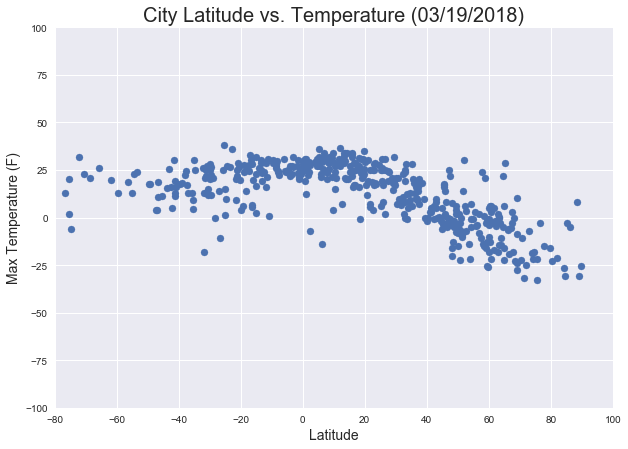

In [62]:
#Latitude vs. Temperature Plot
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Max Temp"]))
sns.set()
plt.grid(True)
plt.title(f"City Latitude vs. Temperature ({now.strftime('%m/%d/%Y')})", fontsize=20)
plt.ylabel("Max Temperature (F)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-100, 100)
plt.xlim(-80, 100)
plt.show()

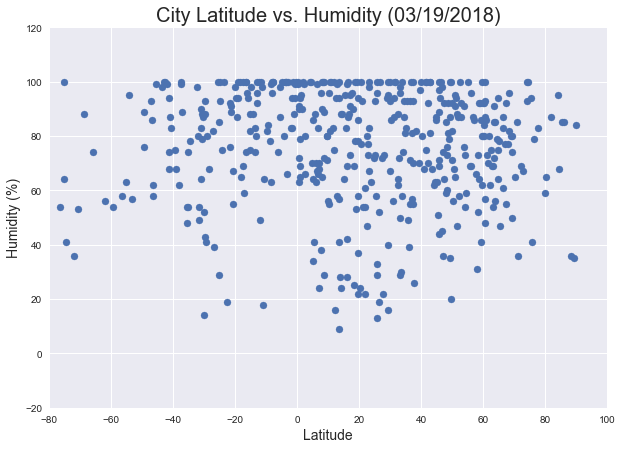

In [63]:
#Latitude vs. Humidity Plot
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Humidity"]))
sns.set()
plt.grid(True)
plt.title(f"City Latitude vs. Humidity ({now.strftime('%m/%d/%Y')})", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-20, 120)
plt.xlim(-80, 100)
plt.show()

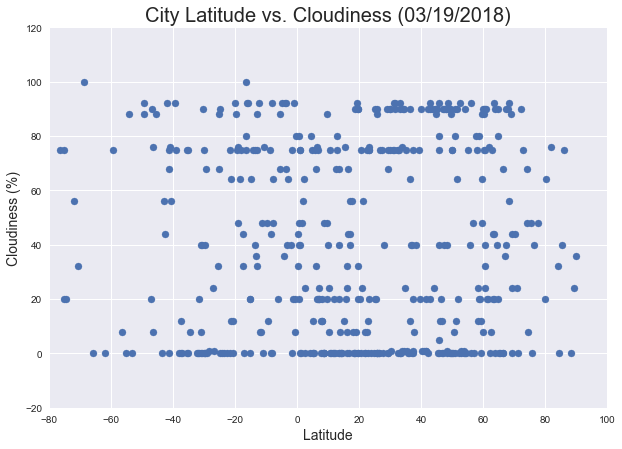

In [66]:
#Latitude vs. Cloudiness Plot
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Cloudiness"]))
sns.set()
plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness ({now.strftime('%m/%d/%Y')})", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-20, 120)
plt.xlim(-80, 100)
plt.show()

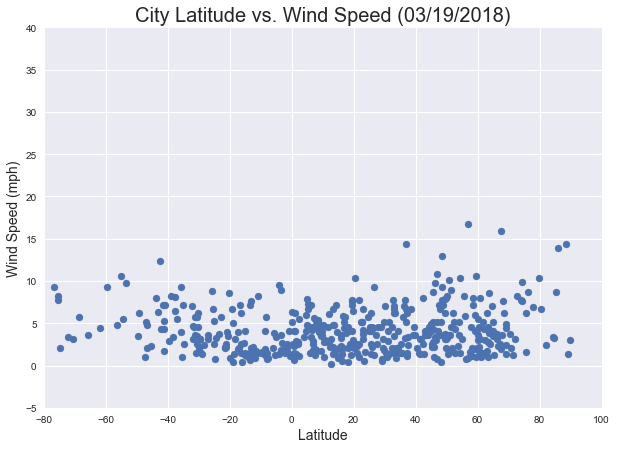

In [67]:
#Latitude vs. Wind Speed Plot
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Wind Speed"]))
sns.set()
plt.grid(True)
plt.title(f"City Latitude vs. Wind Speed ({now.strftime('%m/%d/%Y')})", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-5, 40)
plt.xlim(-80, 100)
plt.savefig("lat_vs_windspeed.png")
plt.show()

In [68]:
print("Observations:")
print("")
print("Observed Trend 1: Temperatures are higher nearer the equator and fall as you move away both north and south")
print("Observed Trend 2: Based on humidity the most arid locations are between 10 and 50 degrees north latitude")
print("Observed Trend 3: There are more observations at latitudes north of the equator than at latitudes south of the equator." + 
      "This may be due to the general distribution of land mass being greater north of the equator.")


Observations:

Observed Trend 1: Temperatures are higher nearer the equator and fall as you move away both north and south
Observed Trend 2: Based on humidity the most arid locations are between 10 and 50 degrees north latitude
Observed Trend 3: There are more observations at latitudes north of the equator than at latitudes south of the equator.This may be due to the general distribution of land mass being greater north of the equator.
